<h1><center>Credit Scoring</center></h1>

In [102]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense

In [81]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


## EDA

In [11]:
# Load the dataset
data = pd.read_excel('Base_Final_Final.xlsx', sheet_name='Original')

In [17]:
# Take the first rows to explore the data
data.head()

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.66,156.88,24
1,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,0.00,156.88,24
2,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.55,156.88,24
3,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.48,156.88,24
4,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.41,156.88,24


In [14]:
# Describe 
data.describe()

,REGIONAL,# CARGAS,EDAD,INGRESOS,EGRESOS,AÑO_CREACION,VALOR ORI.PRESTAM,TASA,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
count,126863.000000,126700.000000,126710.000000,126863.000000,126863.000000,126863.000000,126863.000000,126863.000000,126848.000000,126863.000000,126863.000000
mean,1.497836,1.221618,42.194507,2905.702100,2044.677671,3.229547,8694.760327,21.366844,20.380611,297.650742,39.381798
std,0.653797,1.000052,13.263097,2315.537261,1980.157729,1.392030,6928.536145,1.001125,79.946904,182.267259,13.022025
min,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,500.000000,18.500000,0.000000,0.000000,5.000000
25%,1.000000,1.000000,31.000000,1305.000000,593.000000,2.000000,4000.000000,20.600000,2.610000,173.380000,26.000000
50%,1.000000,1.000000,41.000000,2181.140000,1358.000000,3.000000,6000.000000,22.170000,5.420000,249.660000,37.000000
75%,2.000000,2.000000,51.000000,3800.000000,2847.500000,4.000000,10000.000000,22.170000,14.120000,374.140000,48.000000
max,3.000000,6.000000,89.000000,60000.000000,41449.200000,5.000000,40000.000000,24.320000,4754.960000,1750.630000,78.000000


In [16]:
data.isna().sum()

REGIONAL                0
ESTADO CIVIL          153
# CARGAS              163
NIVEL DE  ESTUDIOS    163
TIPO DE VIVIENDA        0
EDAD                  153
SEXO                  153
INGRESOS                0
EGRESOS                 0
AÑO_CREACION            0
OCUPACION               0
TIPO DE GARANTÍA        0
TIPO DEST.              0
VALOR ORI.PRESTAM       0
TASA                    0
CALIFICAC               0
OTROS RUBROS DEUDA     15
VALOR CUOTA             0
CUOT_TOT                0
dtype: int64

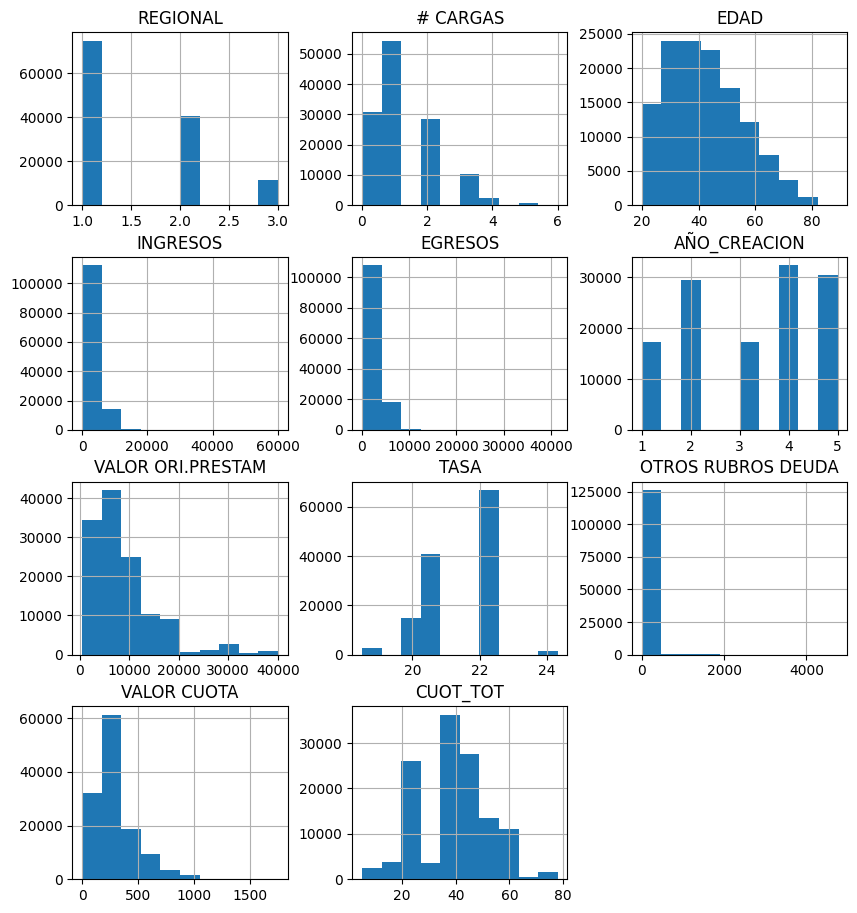

In [30]:
data.hist(grid=True, figsize=(10,11));

In [75]:
variables = data.columns
numeric_variables = data._get_numeric_data().columns
categorical_variables = list(set(variables) - set(numeric_variables))
printmd(f'**Variables in dataset:** {len(variables)}')
printmd(f'**Original quantitative variables:** {len(numeric_variables)}')
print(numeric_variables.to_list())
printmd(f'**Original qualitative variables:** {len(categorical_variables)}')
print(categorical_variables)


**Variables in dataset:** 19

**Original quantitative variables:** 11

['REGIONAL', '# CARGAS', 'EDAD', 'INGRESOS', 'EGRESOS', 'AÑO_CREACION', 'VALOR ORI.PRESTAM', 'TASA', 'OTROS RUBROS DEUDA', 'VALOR CUOTA', 'CUOT_TOT']


**Original qualitative variables:** 8

['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION', 'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS']


#### Qualitative Variables Encoding

It is time to work with qualitative variables, we can use One Encoder or a Label Encoder, in this case study the
qualitative variables are going to be processed as ordinal variables, because most of them represent an order or hierarchy, so will use Label Encoder with previously defined labels.

In [132]:
#Label encoding for qualitative variables
encoder = ce.OrdinalEncoder(cols=['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION',
                                  'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS'],
                    return_df=True,
                       mapping=[{
                           'col': 'SEXO',
                           'mapping': {
                               'None': 0,
                               'Femenino': 0,
                               'Masculino': 1
                               }
                           },
                           {
                            'col': 'TIPO DEST.',
                            'mapping':{
                                'None': 0,
                                'AS': 0,
                                'OT': 0,
                                'IF': 1,
                                'II': 1,
                                'CT': 2,
                                'RP': 2,
                                'TE': 3,
                                'TF': 3,
                                'TL': 3,
                                'TO': 3,
                                'TP': 3,
                                'TT': 3
                            }
                           },
                           {
                            'col': 'ESTADO CIVIL',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Soltero': 0,
                                'Union Libre': 0,
                                'Casado': 1,
                                'Divorciado': 1,
                                'Viudo': 1
                                }
                           },
                           {
                            'col': 'TIPO DE VIVIENDA',
                            'mapping': {
                                'None': 0,
                                'Propia': 0,
                                'Arrendada': 1,
                                'Prestada': 1,
                                'Vive Con Familia': 1
                                }
                           },
                           {
                            'col': 'OCUPACION',
                            'mapping': {
                                'None': 0,
                                'Jubilado': 0,
                                'Acuicultor': 1,
                                'Albañil': 1,
                                'Ama De Casa': 1,
                                'Arrendador': 1,
                                'Artesano': 1,
                                'Barbero': 1,
                                'Carpintero': 1,
                                'Cerrajero ': 1,
                                'Chef / Cocinero Y Afines': 1,
                                'Comerciante': 1,
                                'Conductor / Animador': 1,
                                'Conductor Profesional': 1,
                                'Consultor Profesional': 1,
                                'Consultorias Profesionales': 1,
                                'Contratista': 1,
                                'Cosmetóloga': 1,
                                'Doctor / A': 1,
                                'Electricista': 1,
                                'Estudiante': 1,
                                'Fabricación De Otros Productos De Metal Ncp': 1,
                                'Fabricación de Productos Lácteos': 1,
                                'Faenador / Carnicero': 1,
                                'Ganadero': 1,
                                'Hojalatero': 1,
                                'Horticultor': 1,
                                'Horticultor De Árbol': 1,
                                'Independiente': 1,
                                'Instructor / Capacitador': 1,
                                'Jefe de Área': 1,
                                'Masajista': 1,
                                'Mecánico': 1,
                                'Músico': 1,
                                'Nutricionista': 1,
                                'Panadero / Pastelero': 1,
                                'Peluquero': 1,
                                'Pescador Y Recolector De Productos Del Mar': 1,
                                'Plomero': 1,
                                'Productor De Huevos': 1,
                                'Sastre / Costurera': 1,
                                'Soldador': 1,
                                'Técnico de Audio': 1,
                                'Terapista Y Afines': 1,
                                'Tornero': 1,
                                'Veterinario': 1,
                                'Zapatero': 1,
                                'Analista / Afines': 2,
                                'Asesor Inmobiliario': 2,
                                'Asistentes / Auxiliares /Ayudantes Y Afines': 2,
                                'Atencion Al Cliente': 2,
                                'Bombero': 2,
                                'Cajero': 2,
                                'Conserje / Portero': 2,
                                'Contador': 2,
                                'Despachador / Perchero': 2,
                                'Digitador': 2,
                                'Diseñador Gráfico': 2,
                                'Docente': 2,
                                'Ejecutivo / Afines': 2,
                                'Embasadores / Conservas Y Afines': 2,
                                'Empacador / Cargador': 2,
                                'Empleada Doméstica': 2,
                                'Empleado Privado': 2,
                                'Empleado Público': 2,
                                'Enfermero (A)': 2,
                                'Farmaceuticos  Y Hospitalarios': 2,
                                'Floristería': 2,
                                'Fotografo': 2,
                                'Gerente General': 2,
                                'Guardia de Seguridad': 2,
                                'Jardinero': 2,
                                'Mensajero / Repartidor': 2,
                                'Militar': 2,
                                'Motorista': 2,
                                'Obreros': 2,
                                'Operador De Maquinas De Cultivo / Agricolas': 2,
                                'Otras Actividades De Servicios': 2,
                                'Paramédico': 2,
                                'Periodista': 2,
                                'Policia Nacional': 2,
                                'Publicista': 2,
                                'Quimico Farmaceutico': 2,
                                'Recepcionista / Anfitriona': 2,
                                'Salonero / Barman / Posillero / Similares': 2,
                                'Secretaria / Oficinista': 2,
                                'Subgerencias Y Afines': 2,
                                'Supervisor': 2,
                                'Técnico': 2,
                                'Vendedor / A': 2
                                }
                           },
                           {
                            'col': 'TIPO DE GARANTÍA',
                            'mapping': {
                                'None': 0,
                                'Hipoteca': 0,
                                'Pagaré': 1
                                }
                           },
                           {
                            'col': 'CALIFICAC',
                            'mapping': {
                                'None': 0,
                                'A1': 0,
                                'A2': 0,
                                'A3': 0,
                                'B1': 1,
                                'B2': 1,
                                'C1': 1,
                                'C2': 1,
                                'D': 1,
                                'E': 1,
                                }
                           },
                           {
                            'col': 'NIVEL DE  ESTUDIOS',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Primaria': 0,
                                'Sin Estudios': 0,
                                'Secundaria': 1,
                                'Técnico': 1,
                                'Postgrado': 2,
                                'Universitaria': 2
                                }
                           },
                       ])

In [133]:
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION', 'TIPO DE GARANTÍA']])
encoded_qualitative_variables = encoder.fit_transform(data[['SEXO', 'TIPO DEST.', 
                                                            'ESTADO CIVIL', 'TIPO DE VIVIENDA',
                                                            'OCUPACION', 'TIPO DE GARANTÍA', 'CALIFICAC', 
                                                            'NIVEL DE  ESTUDIOS']])
print(encoded_qualitative_variables)

             SEXO TIPO DEST. ESTADO CIVIL  TIPO DE VIVIENDA  \
0        Femenino         CT       Casado  Vive Con Familia   
1        Femenino         CT       Casado  Vive Con Familia   
2        Femenino         CT       Casado  Vive Con Familia   
3        Femenino         CT       Casado  Vive Con Familia   
4        Femenino         CT       Casado  Vive Con Familia   
...           ...        ...          ...               ...   
126858  Masculino         TE       Casado            Propia   
126859  Masculino         TE       Casado            Propia   
126860  Masculino         TE       Casado            Propia   
126861  Masculino         TE       Casado            Propia   
126862  Masculino         TE       Casado            Propia   

                    OCUPACION TIPO DE GARANTÍA  
0                    Artesano           Pagaré  
1                    Artesano           Pagaré  
2                    Artesano           Pagaré  
3                 Ama De Casa           Pagaré 

In [124]:
test_range_min = 100
test_range_max = 115
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION']][test_range_min:test_range_max])
print(encoded_qualitative_variables[:][test_range_min:test_range_max])

         SEXO TIPO DEST. ESTADO CIVIL TIPO DE VIVIENDA  \
100  Femenino         TE        Viudo           Propia   
101  Femenino         TE        Viudo           Propia   
102  Femenino         TE        Viudo           Propia   
103  Femenino         TE        Viudo           Propia   
104  Femenino         TE        Viudo           Propia   
105  Femenino         TE        Viudo           Propia   
106  Femenino         TE        Viudo           Propia   
107  Femenino         TO      Soltero           Propia   
108  Femenino         TO      Soltero           Propia   
109  Femenino         TO      Soltero           Propia   
110  Femenino         TO      Soltero           Propia   
111  Femenino         TO      Soltero           Propia   
112  Femenino         TO      Soltero           Propia   
113  Femenino         TO      Soltero           Propia   
114  Femenino         TO      Soltero           Propia   

                                       OCUPACION  
100                 

## Data cleaning

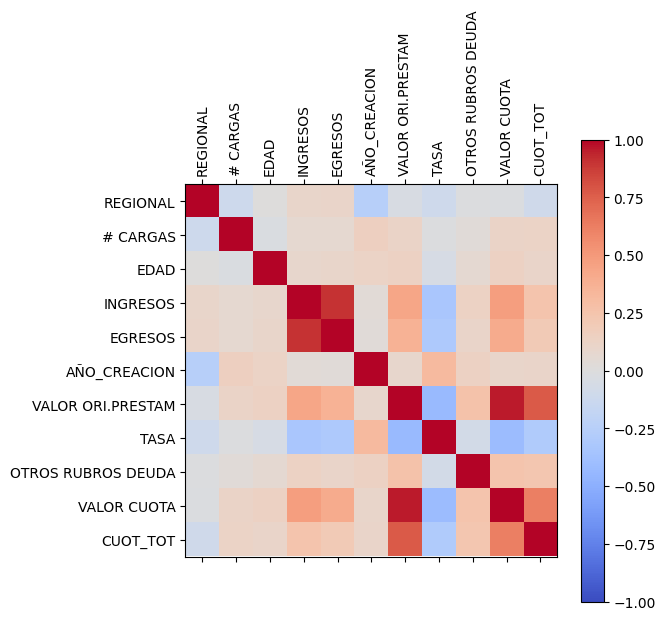

In [72]:
subdata = data[numeric_variables]
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

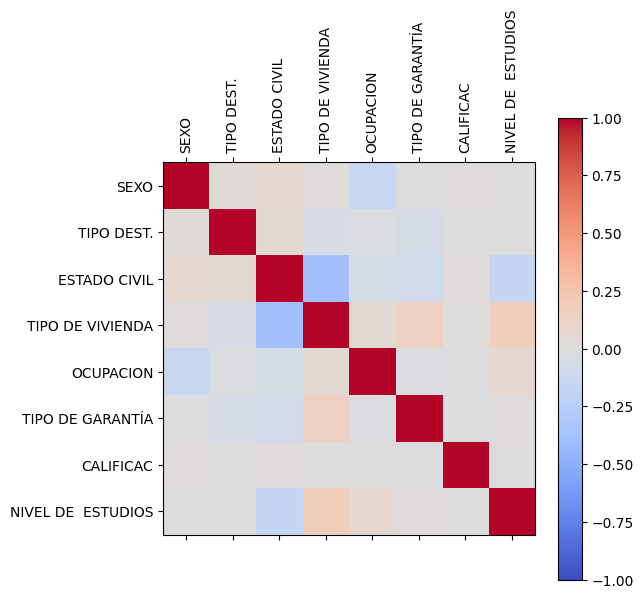

In [134]:
subdata = encoded_qualitative_variables
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

## ANN Modeling

## ANN optimization

## Results